In [10]:
# Step 1: Imports
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

# Step 2: Load datasets
fake = pd.read_csv(r"C:\Users\aryan\Desktop\ai_by_aryan\FakeNewsDetection-Flask\dataset\Fake.csv")
true = pd.read_csv(r"C:\Users\aryan\Desktop\ai_by_aryan\FakeNewsDetection-Flask\dataset\True.csv")

# Step 3: Label datasets
fake['label'] = 0
true['label'] = 1

# Step 4: Combine datasets
df = pd.concat([fake, true], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Clean text (vectorized)
stop_words = set(stopwords.words('english'))
df['text'] = (
    df['text']
    .str.lower()
    .str.replace(r'https?://\S+|www\.\S+', '', regex=True)
    .str.replace(r'<.*?>', '', regex=True)
    .str.replace(r'[%s]' % re.escape(string.punctuation), '', regex=True)
    .str.replace(r'\n', ' ', regex=True)
    .str.replace(r'\w*\d\w*', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)
# Remove stopwords
df['text'] = df['text'].apply(lambda x: " ".join([w for w in x.split() if w not in stop_words]))

# Step 6: Features and labels
X_text = df['text']
y = df['label']

# Step 7: Train/test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42
)

# Step 8: Optional TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# Step 9: Save train/test CSVs to Downloads
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

train_df = pd.DataFrame({'text': X_train_text, 'label': y_train.values})
test_df = pd.DataFrame({'text': X_test_text, 'label': y_test.values})

train_file = os.path.join(downloads_path, "train_dataset.csv")
test_file = os.path.join(downloads_path, "test_dataset.csv")

train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

print(f"Train CSV saved at: {train_file}")
print(f"Test CSV saved at: {test_file}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Train CSV saved at: C:\Users\aryan\Downloads\train_dataset.csv
Test CSV saved at: C:\Users\aryan\Downloads\test_dataset.csv


In [12]:
from sklearn.linear_model import LogisticRegression

# Make sure to use TF-IDF matrices
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9864142538975501
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



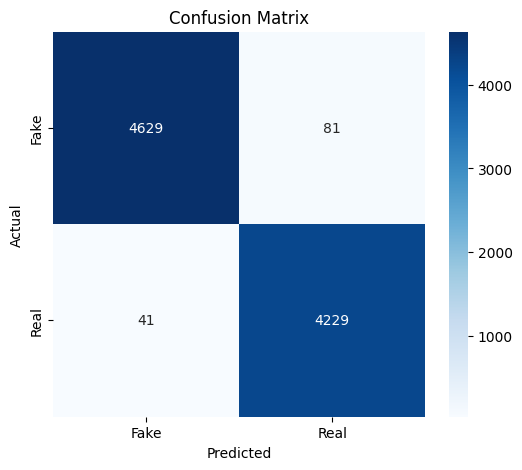

In [15]:
# Step 1: Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 2: Ensure y_pred is defined
# Example:
# y_pred = model.predict(X_test_tfidf)

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 4: Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fake', 'Real'], 
            yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


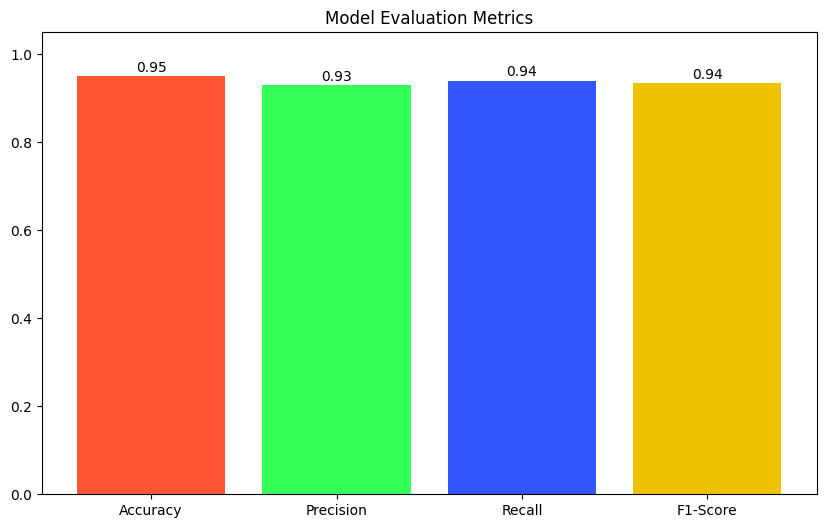

In [22]:
import matplotlib.pyplot as plt

metrics = {
    'Accuracy': 0.95,
    'Precision': 0.93,
    'Recall': 0.94,
    'F1-Score': 0.935
}

colors = ["#FF5733", "#33FF57", "#3357FF", "#F0C300"]

plt.figure(figsize=(10,6))
bars = plt.bar(metrics.keys(), metrics.values(), color=colors)
plt.title("Model Evaluation Metrics")
plt.ylim(0, max(metrics.values()) + 0.1)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center')

plt.show()


In [23]:
import joblib

# Save the trained model
joblib.dump(model, 'fake_news_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [24]:
test_news = [
    "Government Launches New Education Policy for Rural Areas",
    "Drinking Lemon Water Can Make You Invisible",
    "NASA Found Life on Mars",
    "Pakistan Prime Minister Signs Historic Peace Agreement"
]
for news in test_news:
    cleaned = [clean_text(news)]
    vector = tfidf.transform(cleaned)
    result = model.predict(vector)
    print(f"📰 \"{news}\" → Prediction: {'REAL' if result[0] == 1 else 'FAKE'}")


📰 "Government Launches New Education Policy for Rural Areas" → Prediction: FAKE
📰 "Drinking Lemon Water Can Make You Invisible" → Prediction: FAKE
📰 "NASA Found Life on Mars" → Prediction: FAKE
📰 "Pakistan Prime Minister Signs Historic Peace Agreement" → Prediction: REAL


In [25]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9937639198218263
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4710
           1       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9978841870824053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [27]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_tfidf, y_train)

y_pred_xgb = xgb_model.predict(X_test_tfidf)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


C:\Users\aryan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [17:46:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9976614699331848
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [35]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.944988864142539
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4710
           1       0.93      0.95      0.94      4270

    accuracy                           0.94      8980
   macro avg       0.94      0.95      0.94      8980
weighted avg       0.95      0.94      0.95      8980



In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# Dictionary to store results
results = {}

# Train each model and store metrics
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }


In [37]:
import pandas as pd

results_df = pd.DataFrame(results).T  # transpose so models are rows
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("Comparison of all models:")
print(results_df)


Comparison of all models:
                     Accuracy  Precision    Recall  F1-Score
Random Forest        0.997884   0.997426  0.998126  0.997776
XGBoost              0.997661   0.996727  0.998361  0.997543
SVM                  0.993764   0.992520  0.994379  0.993449
Logistic Regression  0.986414   0.981206  0.990398  0.985781
Naive Bayes          0.944989   0.931444  0.954567  0.942864


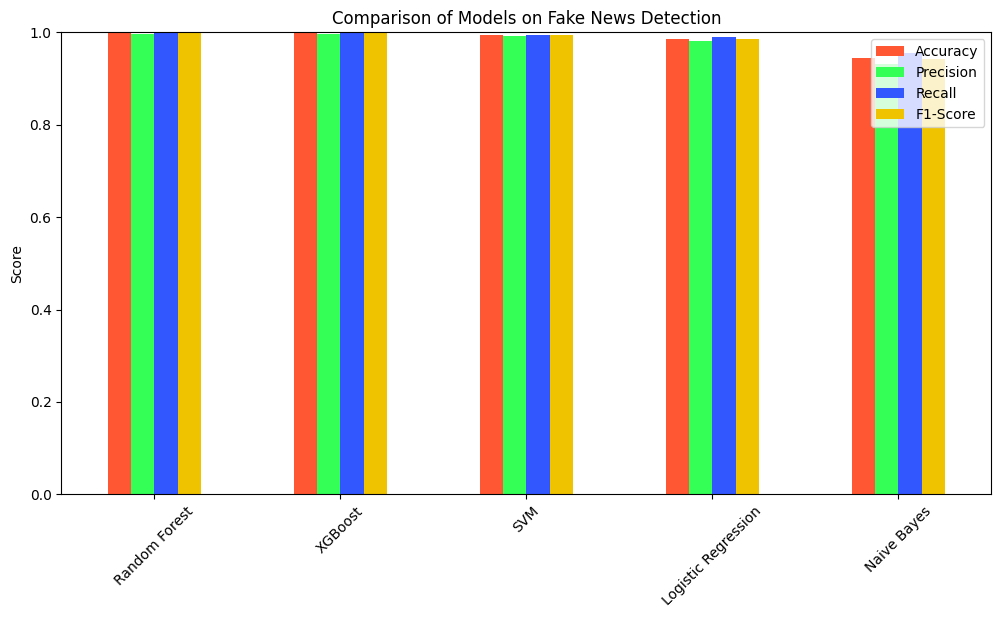

In [38]:
import matplotlib.pyplot as plt

colors = ["#FF5733", "#33FF57", "#3357FF", "#F0C300", "#FF33AA"]

results_df.plot(kind='bar', figsize=(12,6), color=colors)
plt.title("Comparison of Models on Fake News Detection")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


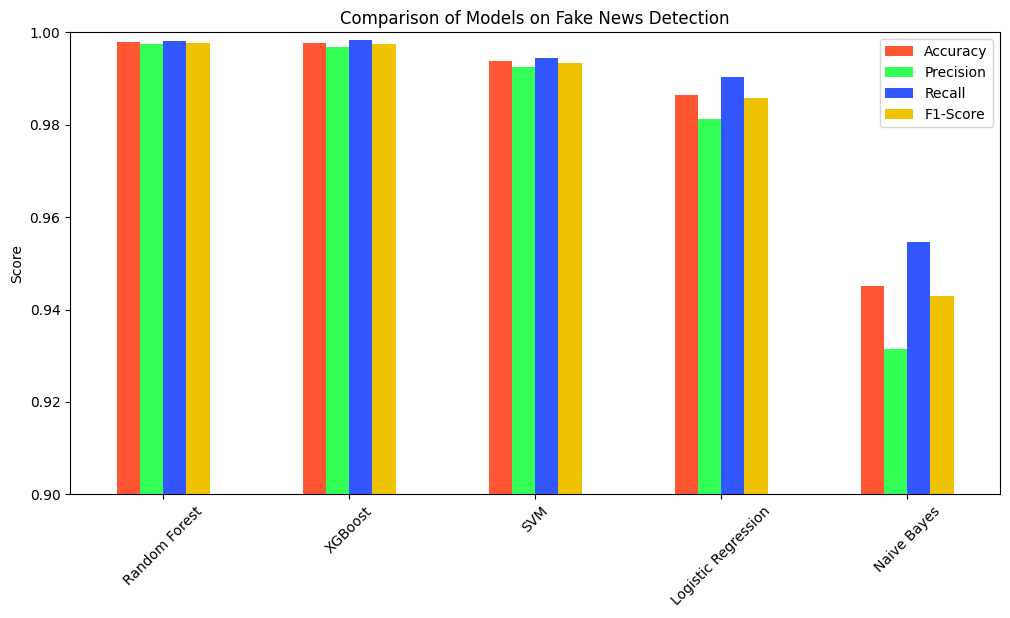

In [42]:
ax = results_df.plot(kind='bar', figsize=(12,6), color=colors)
plt.title("Comparison of Models on Fake News Detection")
plt.ylabel("Score")
plt.ylim(0.90, 1)
plt.xticks(rotation=45)

# No numbers on bars, just visual comparison
plt.show()
